## **Overview**
**we will explore how to develop a suite of different types of LSTM models for time series forecasting.**

* ### **Univariate LSTM Models**

1. Data Preparation
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN LSTM
6. ConvLSTM


* ### **Multivariate LSTM Models**

* ### **Multi-Step LSTM Models**

* ### **Multivariate Multi-Step LSTM Models**



In [1]:
import matplotlib
import warnings
# 忽略警告
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score as r2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasRegressor # 回归神经网络
from numpy import array
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import MaxPooling1D, Conv1D,Flatten
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.python.keras.layers import CuDNNLSTM
from keras.layers import Bidirectional
import keras.backend as K
import os
import glob
import tensorflow as tf
from tensorflow.python.keras.layers import Activation
from keras import optimizers
from pygame import mixer
import time
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

pygame 2.5.1 (SDL 2.28.2, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
mixer.init()
mixer.music.load('../../Resources/ExecuteTipAudio.mp3')

## Univariate LSTM Models
LSTMs can be used to model univariate time series forecasting problems.

These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

We will demonstrate a number of variations of the LSTM model for univariate time series forecasting

## Define variable

In [3]:
reshape1 = 0

## 1. CEEMDAN Data Preparation

In [4]:
IMF = []
xlsx_file = '../../Data/CEEMDAN/58606_2/OneDay/'
xlsx_path = glob.glob(os.path.join(xlsx_file,'*.xlsx'))

data_col_len = pd.read_excel('../../Data/CEEMDAN/58606_2/OneDay/CEEMDAN_58606 Station_g.xlsx',header=None)

for imf_len in range(len(data_col_len.columns)):
    for file in xlsx_path:
         print(file)
         # print(os.path.basename(file))
         imfs = pd.read_excel(file,header=None)
         imfn = imfs.iloc[:,imf_len]
         imfn.to_numpy()
         IMF.append(imfn )
    print(imf_len,"-------------------")

../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_a.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_b.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_c.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_d.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_e.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_f.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_g.xlsx
0 -------------------
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_a.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_b.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_c.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_d.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_e.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_f.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_g.xlsx
1 -------------------
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_a.xlsx
../../Data/

In [5]:
IMF[0][10]

0.5849449916688264

### 结果绘制

In [6]:
def Result_Ana(Model, feature_num):
    print('Result_Ana_Function:',testX.shape)
    y_pred = Model.predict(testX)
    y_pred = np.array(y_pred).reshape(-1, 1)
    # 将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
    prediction_copies_array = np.repeat(y_pred, feature_num,axis=-1)
    prediction_copies_array
    print('-----------prediction copy Shape：',prediction_copies_array.shape,'------------------')
    # Multi Var prediction
    pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), feature_num)))[:,feature_num-1] #进行逆变换但是，只需要最后一列
    # Single prediction
    # pred = scaler.inverse_transform(y_pred) #进行逆变换但是，只需要最后一列

    # print(pred)
    print('testY of shape :',testY.shape)
    y_true = np.array(testY).reshape(-1, 1)
    original_copies_array = np.repeat(testY, feature_num, axis=-1)
    print('IMF_True:',scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num))))
    y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num)))[:, feature_num-1]

    print('feature_num-1_ETO_true:',y_true)

    # Single true value
    # y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

    # y_true
    # pred

    print(pred)
    plt.plot(y_true, color='red', label='Real Value')
    plt.plot(pred, color='blue', label='Pred Value')
    plt.title('Prediction ETO (mm)')
    plt.xlabel('Time (day)')
    plt.ylabel('ETO (mm)')
    plt.legend()
    plt.show()

    # plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)

    # y_true_data = pd.DataFrame(y)
    # y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
    #               index=False)
    # pred_data = pd.DataFrame(pred)
    # pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
    #              index=False)

    print('MSE:',mse(y_true,pred))
    print('MAE:',mae(y_true,pred))
    print('R²:',r2(y_true,pred))
    print('RMSE:',np.sqrt(mse(y_true,pred)))
    print('pred_finally:',pred)

    return y_true,pred

In [7]:
len(IMF)

112

In [8]:
feature_num = len(IMF) / 7

In [9]:
feature_num

16.0

In [10]:
IMF[0:7][2]

0       -0.454365
1        0.396571
2       -1.770660
3        1.786784
4       -1.002048
           ...   
24525   -0.614148
24526   -0.659385
24527    0.883395
24528   -0.437380
24529    1.188857
Name: 0, Length: 24530, dtype: float64

In [11]:
import tensorflow as tf

# Check if GPU is available and set the GPU device
# if tf.test.is_gpu_available():
#     physical_devices = tf.config.list_physical_devices('GPU')
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)


### CNN-LSTM

-------------------------- 0 --------------------------
            one       two     three      four      five            six  \
0     -1.464790 -0.919115 -0.454365 -0.700750  4.012725     685.750749   
1      0.602649  1.217254  0.396571 -0.935308  1.183604    -813.232746   
2      1.359043  1.732350 -1.770660  1.522547 -3.100436    -640.572992   
3      0.450546 -0.091290  1.786784  1.385560  3.499083     544.515857   
4     -1.818005 -0.277202 -1.002048 -0.330014 -3.927123    -225.735636   
...         ...       ...       ...       ...       ...            ...   
24525 -1.318127 -0.733819 -0.614148  0.475756  2.895771 -352873.241491   
24526 -0.154782 -0.111291 -0.659385 -0.358708 -0.420595  436446.198249   
24527  0.122398 -0.078915  0.883395  0.054605 -0.756205 -513694.896792   
24528  0.550918  0.530208 -0.437380 -0.031215  1.639937  544410.537922   
24529  0.561766  0.728185  1.188857  0.095620 -2.894580 -450402.121704   

          seven  
0     -0.363139  
1     -0.151901  
2

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 3s 5ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 1s 4ms/step - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 1s 4ms/step - loss: 0.0107 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 1s 4ms/step - loss: 0.0107 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 1s 4ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 0.0113 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 1s 4ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_l

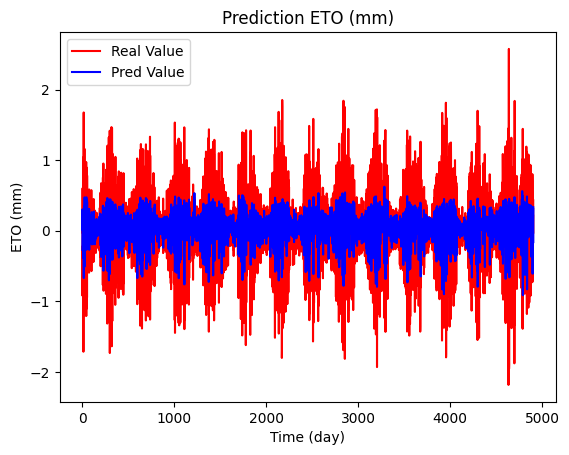

MSE: 0.2485184390761861
MAE: 0.3626035405152795
R²: 0.09928792256161323
RMSE: 0.4985162375251042
pred_finally: [-0.26990965  0.11703188  0.3030279  ...  0.3210116  -0.17445096
  0.33247653]
prediction_result: [-0.26990965  0.11703188  0.3030279  ...  0.3210116  -0.17445096
  0.33247653]
lstm_y_turs: [-0.22846669 -0.9194061   0.47041622 ...  0.22694627 -0.03973494
  0.43138383]
-------------------------- 1 --------------------------
            one       two     three      four      five            six  \
0     -0.717649 -0.700243 -1.302272  1.167898  2.246833    -266.541681   
1     -0.067041  0.133359 -1.809280  1.549877  0.945760    -702.111248   
2      0.406846  0.474059 -0.593264  1.616759  0.143621    -308.938576   
3      0.233040  0.235515  1.043773  1.200236 -0.919376     127.959321   
4     -0.127228 -0.141003  1.191214  0.368845 -0.945895      63.058347   
...         ...       ...       ...       ...       ...            ...   
24525  0.130000  0.020085 -0.993216  0.027438 

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 6ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 2.0387e-04
Epoch 2/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 2.0387e-04
Epoch 3/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_l

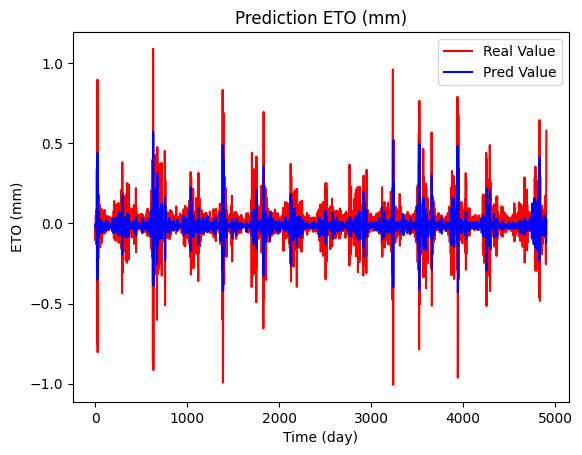

MSE: 0.009735978747909785
MAE: 0.05826562534092155
R²: 0.29037257432539754
RMSE: 0.0986710633768066
pred_finally: [-0.0056649  -0.02243043 -0.02934894 ... -0.09258735 -0.0490278
  0.02151829]
prediction_result: [-0.0056649  -0.02243043 -0.02934894 ... -0.09258735 -0.0490278
  0.02151829]
lstm_y_turs: [-0.01562149 -0.10756524 -0.02491552 ...  0.08294097  0.29797894
  0.57746203]
-------------------------- 2 --------------------------
            one       two     three      four      five            six  \
0     -0.341676  0.979711 -1.181582  0.350818  2.414864     -59.147632   
1     -0.104460  1.669276 -1.545486  0.553184  1.936741    1205.856175   
2     -0.321276  1.773475 -0.876626  0.632451 -0.862360     165.532785   
3     -0.536460  0.647876  0.331070  0.421779 -3.845997   -1139.985967   
4     -0.454172 -0.598511  1.085067  0.130059 -4.377561      37.511552   
...         ...       ...       ...       ...       ...            ...   
24525 -0.816230 -0.477108 -1.100900 -0.070329

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 7ms/step - loss: 0.0093 - accuracy: 2.0385e-04 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0038 - accuracy: 2.0385e-04 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 6ms/step - loss: 0.0036 - accuracy: 2.0385e-04 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 2.0385e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 6ms/step - loss: 0.0036 - accuracy: 2.0385e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0036 - accuracy: 2.0385e-04 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 5ms/step - loss: 0.0035 - accuracy: 2.0385e-04 - val_l

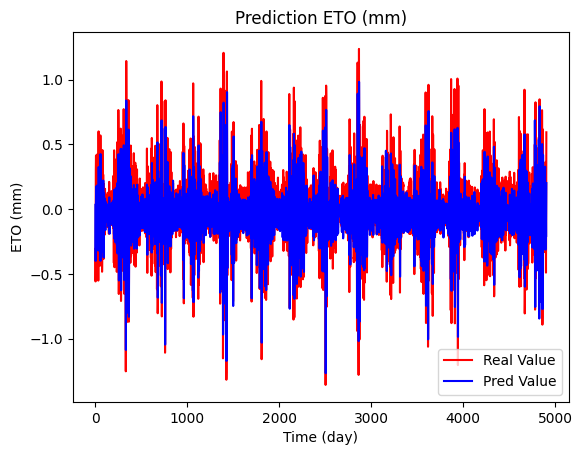

MSE: 0.03791512353555576
MAE: 0.14537886993683993
R²: 0.5072281679215183
RMSE: 0.1947180616572478
pred_finally: [ 0.03407421 -0.23382045 -0.39938548 ... -0.02730048  0.08316164
  0.2018239 ]
prediction_result: [ 0.03407421 -0.23382045 -0.39938548 ... -0.02730048  0.08316164
  0.2018239 ]
lstm_y_turs: [-0.30608954 -0.55767852 -0.47324348 ...  0.16486849  0.46517182
  0.59421051]
-------------------------- 3 --------------------------
            one       two     three      four      five            six  \
0     -0.661736  1.203007 -1.923127  0.080471 -1.565418    -384.149923   
1     -0.802548  1.606931 -2.090151  0.157180 -2.150125     245.882729   
2     -0.699025  1.505821 -1.652161  0.134042 -2.440051     507.008948   
3     -0.725270  0.975604 -0.892493  0.064260 -2.023263     -16.046745   
4     -0.697584  0.506975 -0.079269 -0.015150 -0.811144    -337.765596   
...         ...       ...       ...       ...       ...            ...   
24525 -0.376335 -1.304232 -0.481655 -0.090300

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 5s 9ms/step - loss: 0.0083 - accuracy: 2.0385e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0023 - accuracy: 2.0385e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0020 - accuracy: 2.0385e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0019 - accuracy: 2.0385e-04 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0019 - accuracy: 2.0385e-04 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0018 - accuracy: 2.0385e-04 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0019 - accuracy: 2.0385e-04 - val_l

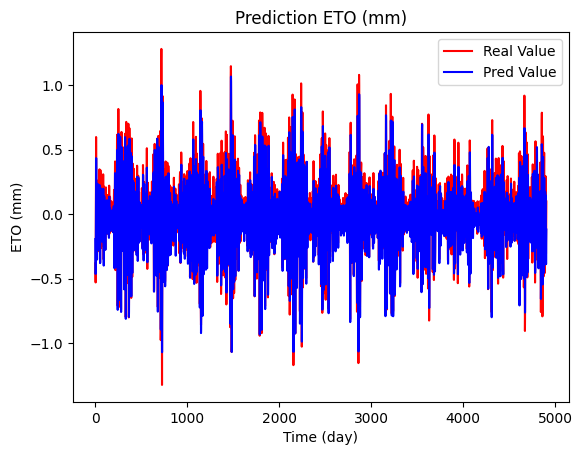

MSE: 0.019909662060056958
MAE: 0.1090124857024111
R²: 0.7660343281575492
RMSE: 0.14110160190464513
pred_finally: [-0.19358845 -0.39470208 -0.4638763  ... -0.29313853 -0.20474645
 -0.1198178 ]
prediction_result: [-0.19358845 -0.39470208 -0.4638763  ... -0.29313853 -0.20474645
 -0.1198178 ]
lstm_y_turs: [-0.38186312 -0.51136228 -0.53018441 ... -0.07308708  0.03796344
  0.09813321]
-------------------------- 4 --------------------------
            one       two     three      four      five           six  \
0     -0.389531  0.586490 -0.654795 -0.110076  2.704542    172.547296   
1     -0.353339  0.560630 -0.630126 -0.125011  2.992187    292.905825   
2     -0.351755  0.394267 -0.444077 -0.086728  3.231139    551.059783   
3     -0.358551  0.163739 -0.154264 -0.028367  3.278532    755.747424   
4     -0.321253 -0.128788  0.188916  0.016481  3.004265    678.752445   
...         ...       ...       ...       ...       ...           ...   
24525  0.433728  0.718367  1.196502  0.126054 -5.30

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 8.1145e-04 - val_accuracy: 4.0775e-04
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 4.0775e-04
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 7.3720e-04 - val_accuracy: 4.0775e-04
Epoch 4/20
307/307 [==============================] - 2s 7ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 6.9001e-04 - val_accuracy: 4.0775e-04
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 4.0775e-04
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 9.7881e-04 - accuracy: 0.0000e+00 - val_loss: 7.5198e-04 - val_accuracy: 4.0775e-04
Epoch 7/20
307/307 [==============================] - 2s 7ms/step - loss: 9.2494e-04 - accu

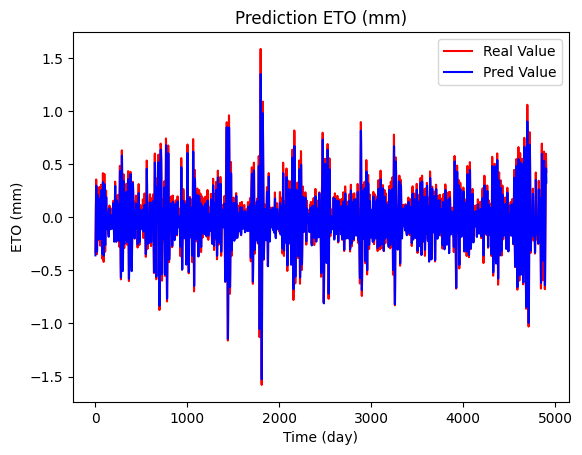

MSE: 0.007287607534444258
MAE: 0.06613781212626692
R²: 0.9074749202903833
RMSE: 0.0853674852297071
pred_finally: [-0.3582202  -0.332273   -0.2508411  ...  0.42669615  0.37432483
  0.32839817]
prediction_result: [-0.3582202  -0.332273   -0.2508411  ...  0.42669615  0.37432483
  0.32839817]
lstm_y_turs: [-0.33046399 -0.26250496 -0.15866618 ...  0.50942294  0.46093815
  0.42654371]
-------------------------- 5 --------------------------
            one       two     three      four      five           six  \
0     -0.826169 -1.337820  0.515877 -0.021205 -1.880795  -1238.158886   
1     -0.901505 -1.384742  0.647517 -0.022810 -1.979773  -1255.023748   
2     -0.934304 -1.401546  0.774530 -0.041143 -2.080201  -1263.141402   
3     -0.909293 -1.391681  0.891331 -0.073654 -2.165465  -1253.146649   
4     -0.825918 -1.374637  0.992247 -0.116823 -2.215935  -1218.249177   
...         ...       ...       ...       ...       ...           ...   
24525  0.123502 -0.367083 -0.808054 -0.015135  1.66

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 5.7590e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 8.3982e-04 - accuracy: 0.0000e+00 - val_loss: 3.8844e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 7.5911e-04 - accuracy: 0.0000e+00 - val_loss: 5.6626e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 7ms/step - loss: 6.7023e-04 - accuracy: 0.0000e+00 - val_loss: 6.8682e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 6.3623e-04 - accuracy: 0.0000e+00 - val_loss: 3.4231e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 5.7924e-04 - accuracy: 0.0000e+00 - val_loss: 3.3927e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 7ms/step -

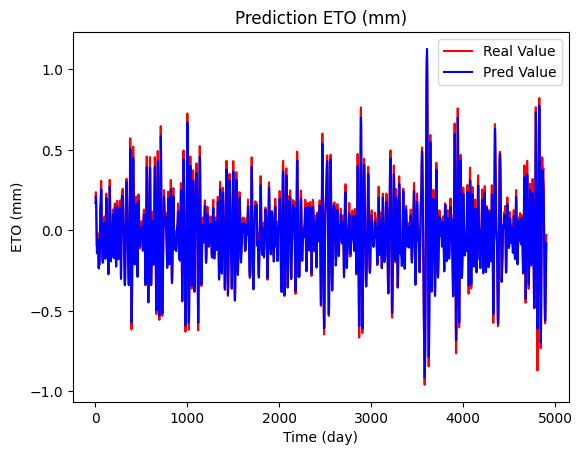

MSE: 0.0029550728230189048
MAE: 0.04299959474415112
R²: 0.9531399248509889
RMSE: 0.054360581518402694
pred_finally: [ 0.1696555   0.17679004  0.18365027 ... -0.15450923 -0.1031471
 -0.07894602]
prediction_result: [ 0.1696555   0.17679004  0.18365027 ... -0.15450923 -0.1031471
 -0.07894602]
lstm_y_turs: [ 0.20117115  0.20871215  0.21738666 ... -0.05924301 -0.03032325
 -0.02786112]
-------------------------- 6 --------------------------
            one       two     three      four      five           six  \
0      1.928907  1.199636  0.270012 -0.869554 -1.364838  -1616.392266   
1      1.949215  1.249280  0.288430 -0.873038 -1.372098  -1692.993038   
2      1.959629  1.308219  0.310103 -0.868264 -1.354231  -1744.598684   
3      1.962431  1.375429  0.334793 -0.855393 -1.312153  -1770.009776   
4      1.959622  1.450769  0.360931 -0.834913 -1.248742  -1768.183721   
...         ...       ...       ...       ...       ...           ...   
24525 -0.982413 -0.737453 -0.779654 -0.176705  3.5

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 5s 9ms/step - loss: 0.0070 - accuracy: 1.0193e-04 - val_loss: 4.3084e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 7.8636e-04 - accuracy: 1.0193e-04 - val_loss: 8.4717e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 6.0285e-04 - accuracy: 1.0193e-04 - val_loss: 8.3584e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 6.2313e-04 - accuracy: 1.0193e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 8ms/step - loss: 5.3903e-04 - accuracy: 1.0193e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 8ms/step - loss: 5.0198e-04 - accuracy: 1.0193e-04 - val_loss: 6.9314e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 8ms/step - loss: 5

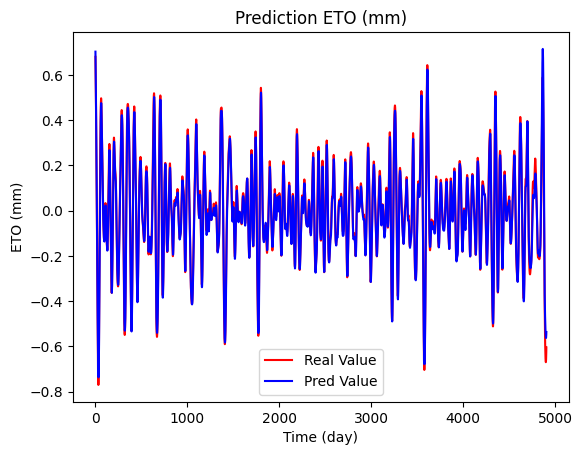

MSE: 0.0007573946575870422
MAE: 0.02078343568806579
R²: 0.9830610440756183
RMSE: 0.02752080408685477
pred_finally: [ 0.7033362   0.6737277   0.64029294 ... -0.5571862  -0.5493234
 -0.5366828 ]
prediction_result: [ 0.7033362   0.6737277   0.64029294 ... -0.5571862  -0.5493234
 -0.5366828 ]
lstm_y_turs: [ 0.6805114   0.64891006  0.61484291 ... -0.64513045 -0.62748226
 -0.60462463]
-------------------------- 7 --------------------------
            one       two     three      four      five           six  \
0     -3.219874 -5.485443  0.444272  0.209120 -1.074872   -466.674561   
1     -3.227455 -5.520673  0.455919  0.204964 -1.069695   -448.973719   
2     -3.237745 -5.552130  0.464966  0.202024 -1.058711   -429.230702   
3     -3.251243 -5.579408  0.471272  0.200244 -1.041853   -407.346748   
4     -3.268508 -5.602469  0.474697  0.199483 -1.019074   -383.370771   
...         ...       ...       ...       ...       ...           ...   
24525  1.650553  3.775691 -0.054213 -0.171277  1.38

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 7ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 2.2584e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 5.5156e-04 - accuracy: 0.0000e+00 - val_loss: 2.5986e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 4.5256e-04 - accuracy: 0.0000e+00 - val_loss: 4.9502e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 7ms/step - loss: 3.8970e-04 - accuracy: 0.0000e+00 - val_loss: 2.3170e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 3.6481e-04 - accuracy: 0.0000e+00 - val_loss: 3.2385e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 3.2341e-04 - accuracy: 0.0000e+00 - val_loss: 4.5429e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 7ms/step -

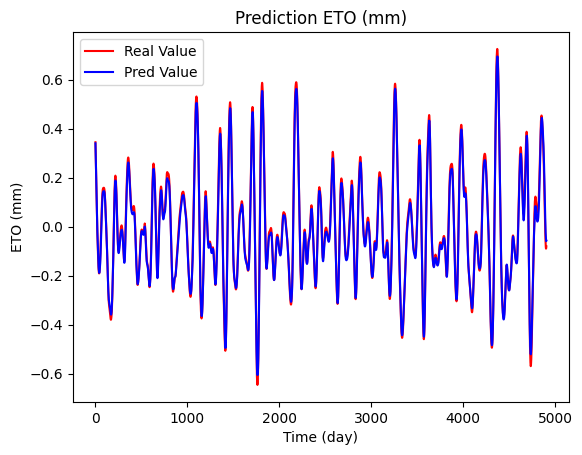

MSE: 0.0003738612388052662
MAE: 0.015248943020104608
R²: 0.9924491836974438
RMSE: 0.01933549168770389
pred_finally: [ 0.34024253  0.32601202  0.3106173  ... -0.05944064 -0.05924789
 -0.05729949]
prediction_result: [ 0.34024253  0.32601202  0.3106173  ... -0.05944064 -0.05924789
 -0.05729949]
lstm_y_turs: [ 0.34474668  0.329054    0.312468   ... -0.08822079 -0.08503254
 -0.08037438]
-------------------------- 8 --------------------------
            one       two     three      four      five           six  \
0      0.795884 -2.062031  0.525401 -0.006315 -0.727792  -1078.049619   
1      0.822904 -2.065012  0.528755 -0.009697 -0.730367  -1086.374612   
2      0.851711 -2.066206  0.532036 -0.013404 -0.731635  -1094.829374   
3      0.882275 -2.065579  0.535246 -0.017434 -0.731553  -1103.436139   
4      0.914519 -2.063140  0.538391 -0.021782 -0.730096  -1112.191238   
...         ...       ...       ...       ...       ...           ...   
24525  3.175849  1.980456  0.699727  0.145954 -0

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0088 - accuracy: 0.0000e+00 - val_loss: 8.7604e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 9.2267e-04 - accuracy: 0.0000e+00 - val_loss: 4.9832e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 6.3629e-04 - accuracy: 0.0000e+00 - val_loss: 3.7207e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 7ms/step - loss: 5.7801e-04 - accuracy: 0.0000e+00 - val_loss: 4.2748e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 5.6915e-04 - accuracy: 0.0000e+00 - val_loss: 5.0736e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 5.0409e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 7ms/step - los

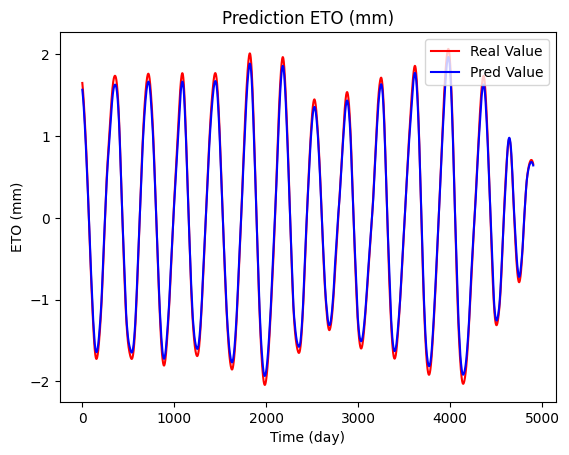

MSE: 0.004889212978543178
MAE: 0.06383679382925608
R²: 0.9966075488692457
RMSE: 0.06992290739481002
pred_finally: [1.5681772  1.5575696  1.5464004  ... 0.6501197  0.64611506 0.64194095]
prediction_result: [1.5681772  1.5575696  1.5464004  ... 0.6501197  0.64611506 0.64194095]
lstm_y_turs: [1.65113333 1.64004312 1.62842536 ... 0.66911005 0.66466237 0.65999992]
-------------------------- 9 --------------------------
            one       two     three      four      five           six  \
0     -3.395099 -2.809848 -0.004397  0.231498 -1.222674      4.595343   
1     -3.408695 -2.811715 -0.004194  0.232764 -1.225061      6.431001   
2     -3.422006 -2.813528 -0.003995  0.233998 -1.227102      8.606319   
3     -3.435029 -2.815286 -0.003800  0.235202 -1.228801     11.115898   
4     -3.447763 -2.816988 -0.003610  0.236372 -1.230158     13.950662   
...         ...       ...       ...       ...       ...           ...   
24525  2.425023  1.918073  1.100583  0.069358  1.751016  20640.874202  

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 6.8031e-04 - val_accuracy: 2.0387e-04
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 6.5638e-04 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 2.0387e-04
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 5.1580e-04 - accuracy: 0.0000e+00 - val_loss: 9.8682e-04 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 4.8194e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 2s 8ms/step - loss: 3.7493e-04 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 2s 8ms/step - loss: 3.5104e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 2s 7ms/step - loss: 3.5442e-0

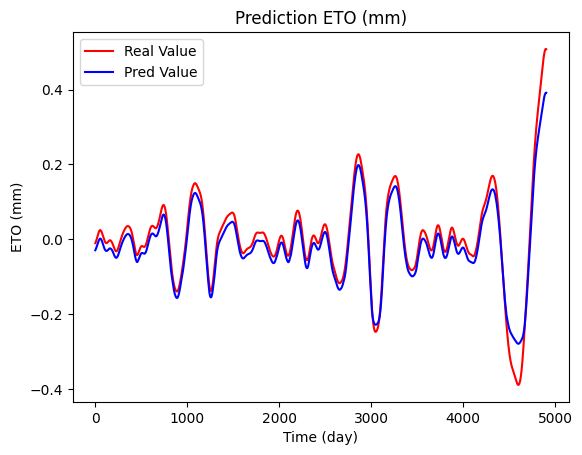

MSE: 0.0009247322677058567
MAE: 0.02485839934165907
R²: 0.9402372985584867
RMSE: 0.030409410841150092
pred_finally: [-0.02917718 -0.02866052 -0.02813502 ...  0.39190292  0.3919082
  0.39185455]
prediction_result: [-0.02917718 -0.02866052 -0.02813502 ...  0.39190292  0.3919082
  0.39185455]
lstm_y_turs: [-0.01020272 -0.00967183 -0.00910924 ...  0.50870622  0.50846859
  0.50814429]
-------------------------- 10 --------------------------
            one       two     three      four      five           six  \
0     -0.469599 -0.280273 -0.842040 -0.310257  5.121896   -854.141494   
1     -0.470964 -0.279857 -0.844430 -0.310420  5.133671   -853.328051   
2     -0.472273 -0.279384 -0.846795 -0.310560  5.145205   -852.474965   
3     -0.473527 -0.278853 -0.849136 -0.310678  5.156497   -851.581444   
4     -0.474724 -0.278265 -0.851452 -0.310774  5.167548   -850.646626   
...         ...       ...       ...       ...       ...           ...   
24525  0.862693  1.341498 -0.163741  0.045221  0.

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 6.5190e-05 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 6.5798e-04 - accuracy: 0.0000e+00 - val_loss: 2.1716e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 5.1991e-04 - accuracy: 0.0000e+00 - val_loss: 4.7570e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 4.6337e-04 - accuracy: 0.0000e+00 - val_loss: 5.0147e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 8ms/step - loss: 4.2774e-04 - accuracy: 0.0000e+00 - val_loss: 6.0954e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 8ms/step - loss: 3.6188e-04 - accuracy: 0.0000e+00 - val_loss: 8.4548e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 8ms/step -

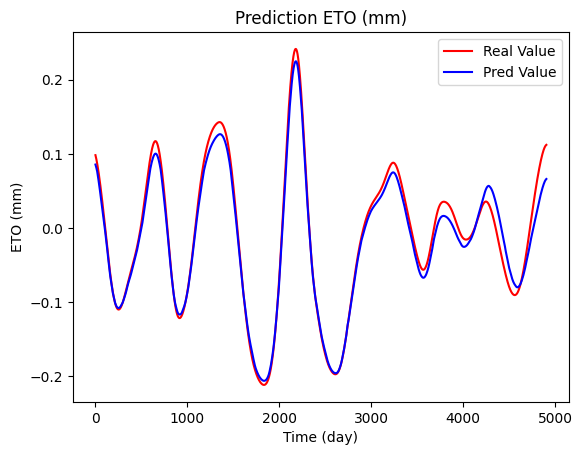

MSE: 0.00020684057795062214
MAE: 0.010815627711186396
R²: 0.9785672441148994
RMSE: 0.014381953203602846
pred_finally: [0.08569644 0.08529221 0.08487671 ... 0.06596431 0.0660932  0.06621364]
prediction_result: [0.08569644 0.08529221 0.08487671 ... 0.06596431 0.0660932  0.06621364]
lstm_y_turs: [0.09834981 0.09785964 0.09735627 ... 0.11204367 0.1121496  0.11224567]
-------------------------- 11 --------------------------
            one       two     three      four      five           six  \
0     -0.770274 -0.335700 -0.511797 -0.136474  1.225237   -525.053920   
1     -0.770275 -0.336619 -0.512329 -0.136544  1.225578   -524.760084   
2     -0.770269 -0.337541 -0.512849 -0.136612  1.225903   -524.449984   
3     -0.770253 -0.338465 -0.513358 -0.136678  1.226211   -524.123608   
4     -0.770229 -0.339391 -0.513856 -0.136742  1.226503   -523.780949   
...         ...       ...       ...       ...       ...           ...   
24525  0.947129  0.354504 -0.382501  0.062982  0.009957  11494.389

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0107 - accuracy: 0.0000e+00 - val_loss: 2.5598e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 7.4511e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 6.4983e-04 - accuracy: 0.0000e+00 - val_loss: 2.7128e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 5.4338e-04 - accuracy: 0.0000e+00 - val_loss: 3.0100e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 4.7603e-04 - accuracy: 0.0000e+00 - val_loss: 4.6030e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 4.2564e-04 - accuracy: 0.0000e+00 - val_loss: 8.6623e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 7ms/step - los

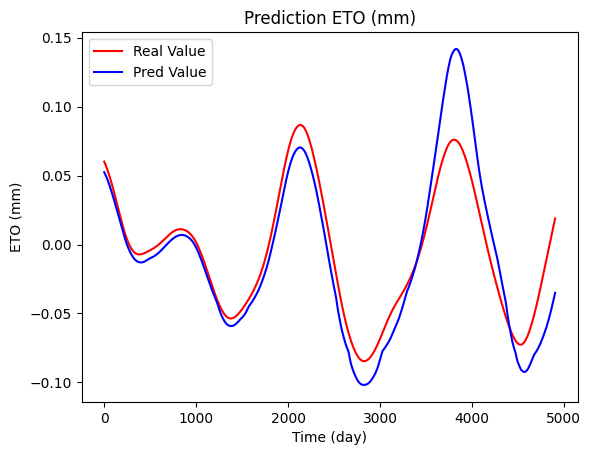

MSE: 0.0005084729445728918
MAE: 0.016574396753747823
R²: 0.7598920033129505
RMSE: 0.02254934465949935
pred_finally: [ 0.05245574  0.05231772  0.05217801 ... -0.03563172 -0.03531593
 -0.03500007]
prediction_result: [ 0.05245574  0.05231772  0.05217801 ... -0.03563172 -0.03531593
 -0.03500007]
lstm_y_turs: [0.06013331 0.05998498 0.05983527 ... 0.01831739 0.01862247 0.01892721]
-------------------------- 12 --------------------------
            one       two     three      four      five          six     seven
0     -0.293320  0.399027 -0.416052 -0.044624  0.541572  -432.318809 -0.146577
1     -0.293373  0.399370 -0.416079 -0.044669  0.541195  -432.034984 -0.146556
2     -0.293426  0.399711 -0.416105 -0.044713  0.540814  -431.748634 -0.146535
3     -0.293478  0.400049 -0.416130 -0.044756  0.540430  -431.459759 -0.146512
4     -0.293531  0.400385 -0.416155 -0.044799  0.540042  -431.168361 -0.146489
...         ...       ...       ...       ...       ...          ...       ...
24525  0.503

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 5s 9ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 1.2572e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 6.9856e-04 - accuracy: 0.0000e+00 - val_loss: 4.5798e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 5.5194e-04 - accuracy: 0.0000e+00 - val_loss: 7.6017e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 5.6144e-04 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 8ms/step - loss: 4.3903e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 8ms/step - loss: 4.4701e-04 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 8ms/step - loss: 4.059

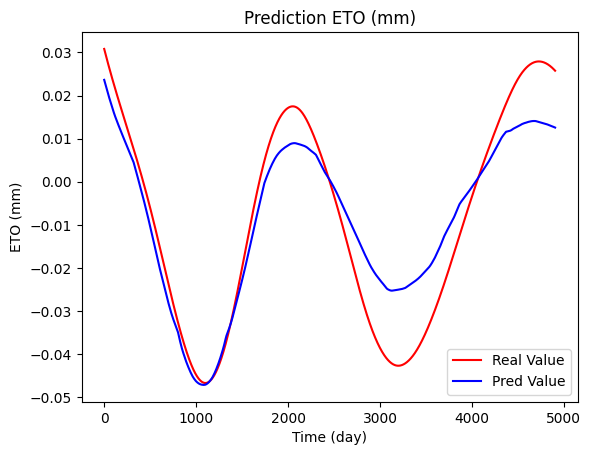

MSE: 7.830925163779697e-05
MAE: 0.007219018066570639
R²: 0.8652350667636572
RMSE: 0.008849251473305354
pred_finally: [0.02364078 0.02356312 0.02348554 ... 0.01258864 0.01257873 0.01256873]
prediction_result: [0.02364078 0.02356312 0.02348554 ... 0.01258864 0.01257873 0.01256873]
lstm_y_turs: [0.03081561 0.0307324  0.0306493  ... 0.0258067  0.02578355 0.02576027]
-------------------------- 13 --------------------------
            one       two     three      four      five          six     seven
0     -0.476528 -0.535954  0.058115  0.156373  0.794584  -145.512472 -0.188095
1     -0.476607 -0.536039  0.058120  0.156408  0.794350  -145.482358 -0.187964
2     -0.476685 -0.536123  0.058125  0.156444  0.794115  -145.452379 -0.187833
3     -0.476763 -0.536207  0.058131  0.156480  0.793880  -145.422534 -0.187702
4     -0.476840 -0.536291  0.058136  0.156515  0.793644  -145.392825 -0.187571
...         ...       ...       ...       ...       ...          ...       ...
24525  0.564557  0.217076

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 5s 9ms/step - loss: 0.0102 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 8.7429e-04 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 6.3973e-04 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 5.2690e-04 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 8ms/step - loss: 4.8282e-04 - accuracy: 0.0000e+00 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 8ms/step - loss: 4.3047e-04 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 8ms/step - loss: 4.2073e-04 - accu

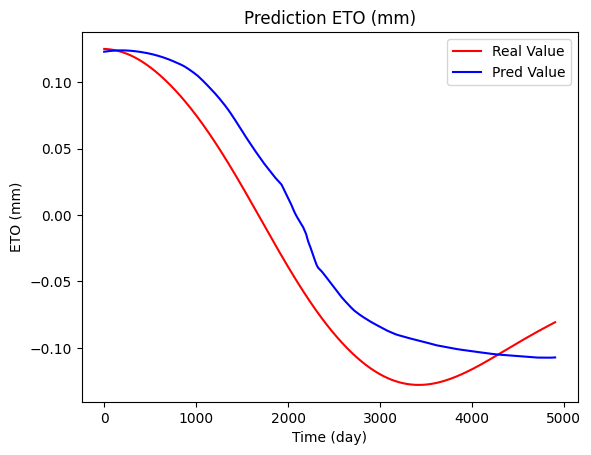

MSE: 0.0009415992417439984
MAE: 0.026933049145696546
R²: 0.8835755925843762
RMSE: 0.030685489107133333
pred_finally: [ 0.12308951  0.12309978  0.12310994 ... -0.10724658 -0.10724326
 -0.10723992]
prediction_result: [ 0.12308951  0.12309978  0.12310994 ... -0.10724658 -0.10724326
 -0.10723992]
lstm_y_turs: [ 0.12518942  0.12518682  0.12518412 ... -0.08077764 -0.0807417
 -0.08070578]
-------------------------- 14 --------------------------
            one       two     three      four      five          six     seven
0      6.384564  2.351739  0.427714  1.171439  0.323124   546.749846  0.072279
1      6.384626  2.351738  0.427732  1.171515  0.323070   546.746225  0.072317
2      6.384688  2.351736  0.427750  1.171591  0.323016   546.742637  0.072355
3      6.384749  2.351735  0.427769  1.171667  0.322962   546.739081  0.072393
4      6.384811  2.351734  0.427787  1.171742  0.322908   546.735558  0.072431
...         ...       ...       ...       ...       ...          ...       ...
24525

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 4s 8ms/step - loss: 0.0017 - accuracy: 1.0193e-04 - val_loss: 0.0525 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 1.3467e-04 - accuracy: 1.0193e-04 - val_loss: 0.0513 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 1.1372e-04 - accuracy: 1.0193e-04 - val_loss: 0.0507 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 2s 7ms/step - loss: 9.6586e-05 - accuracy: 1.0193e-04 - val_loss: 0.0535 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 8.3968e-05 - accuracy: 1.0193e-04 - val_loss: 0.0668 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 9.3470e-05 - accuracy: 1.0193e-04 - val_loss: 0.0684 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 2s 7ms/step - loss: 6.8861e-05 - accu

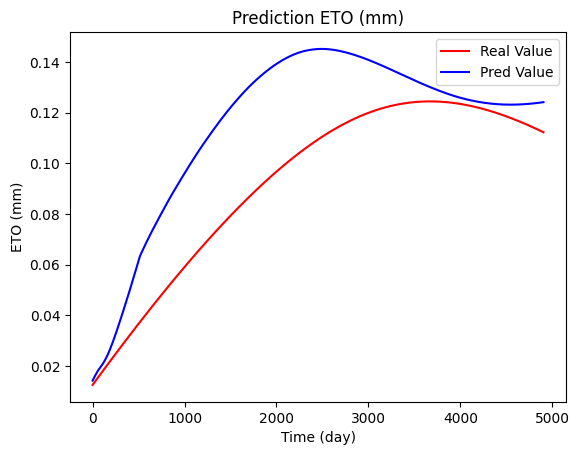

MSE: 0.0007453870476830005
MAE: 0.022505959102847875
R²: 0.34293453867263357
RMSE: 0.027301777372233486
pred_finally: [0.01420878 0.01427499 0.01434119 ... 0.12408271 0.12408776 0.12409279]
prediction_result: [0.01420878 0.01427499 0.01434119 ... 0.12408271 0.12408776 0.12409279]
lstm_y_turs: [0.0125133  0.01256298 0.01261267 ... 0.11225316 0.11223564 0.11221812]
-------------------------- 15 --------------------------
             one        two     three      four       five          six  \
0      15.116889  11.746817  5.049037  2.831638  76.451014  5656.498029   
1      15.116868  11.746819  5.049030  2.831603  76.450965  5656.492634   
2      15.116847  11.746820  5.049022  2.831569  76.450915  5656.487220   
3      15.116826  11.746821  5.049014  2.831534  76.450866  5656.481787   
4      15.116805  11.746823  5.049006  2.831500  76.450817  5656.476336   
...          ...        ...       ...       ...        ...          ...   
24525  15.959476  13.210562  4.650699  1.285862  71.

<timed exec>:101: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 5s 8ms/step - loss: 9.5756e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 2.0387e-04
Epoch 2/20
307/307 [==============================] - 2s 7ms/step - loss: 1.1154e-04 - accuracy: 0.0000e+00 - val_loss: 8.2221e-04 - val_accuracy: 2.0387e-04
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 7.8130e-05 - accuracy: 0.0000e+00 - val_loss: 8.2595e-04 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 2s 7ms/step - loss: 6.5547e-05 - accuracy: 0.0000e+00 - val_loss: 5.1128e-04 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 2s 7ms/step - loss: 5.8395e-05 - accuracy: 0.0000e+00 - val_loss: 6.0013e-04 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 2s 7ms/step - loss: 5.2347e-05 - accuracy: 0.0000e+00 - val_loss: 6.7880e-04 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 2s 7ms/step -

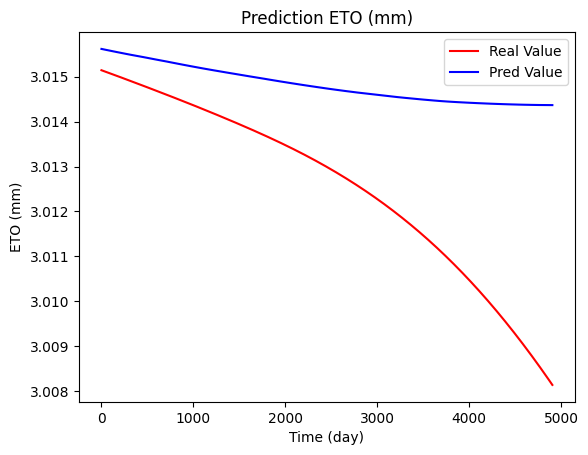

MSE: 7.719831487360848e-06
MAE: 0.002281126383570162
R²: -1.0719968035481449
RMSE: 0.0027784584732115122
pred_finally: [3.0156178 3.0156176 3.0156171 ... 3.0143669 3.0143669 3.0143669]
prediction_result: [3.0156178 3.0156176 3.0156171 ... 3.0143669 3.0143669 3.0143669]
lstm_y_turs: [3.01514353 3.01514279 3.01514205 ... 3.00814312 3.00814013 3.00813714]
CPU times: total: 7h 10min 37s
Wall time: 1h 59min 54s


In [12]:
%%time
imf_choose = 0
finally_rsult = []
finally_y_true = []

for imf_run in range(int(len(IMF) / 7)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+7][:]
    imf_choose = imf_choose + 7

    print('--------------------------',imf_run,'--------------------------')
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)

    df_IMF = pd.DataFrame(IMF_Input)
    df_IMF.columns = ['one','two','three','four','five','six', 'seven']

    print(df_IMF)

    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    sacler_data_len = len(df_IMF.columns)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data


    df_training, df_testing = splitData(df, 0.2)
    print('df_training.shape:',df_training.shape)
    print('df_testing.shape:',df_testing.shape)

    def createXY(data,n_past,n_steps_out):
        dataX,dataY = list(),list()

        for i in range(len(data)):
            ## such as: len(data) = 19624
            end_ix = i + n_past ## 0+3=3,1+3=4,...,19618+3=19621
            out_end_ix = end_ix + n_steps_out ## 3+3=6,4+3=7,...,19621+3=19624
            # print('out_end_ix:',out_end_ix)
            '''
            加入此处判断，使得最终的dataX和dataY中每行的数组长度一致，进而可以转换为array(数组),如若不加以限制，
            则导致最后几次循环由于i是在len(data)范围内的，
            但是由于out_end_ix=end_ix + n_steps_out,最终会超出data的数据范围，而导致其无法获取到数据,
            加入dataY之后，最后几行的数据长度是和前面的数据长度不一致，最终导致无法进行array转换
            '''
            if out_end_ix > len(data): ## 6 < len(data),7<len(data),...,19623+3=19626>len(data)=19624
                # print("------------out_end_ix of end",out_end_ix,'---------------')
                break

            dataX.append(data[i:end_ix,0:data.shape[1]]) ## 0:3,0:7;1:4,0:7
            dataY.append(data[end_ix:out_end_ix,data.shape[1]-1]) ##3:6,6;4:7,6
        return np.array(dataX), np.array(dataY)

    n_past=1
    n_steps_out=1

    trainX, trainY = createXY(df_training, n_past, n_steps_out)
    testX, testY = createXY(df_testing, n_past, n_steps_out)

    reshape1 = testY.shape[0]

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)

    trainY = trainY.reshape(-1)
    testY = testY.reshape(-1)
    print('trainY Shape 2 ---', trainY.shape)
    print('testY Shape 2 ---', testY.shape)
    trainX = np.expand_dims(trainX,axis=1)
    testX = np.expand_dims(testX,axis=1)
    print('expand_dims_trainX of shape',trainX.shape)
    print('expand_dims_testX of shape',testX.shape)

    print('----------------------------',imf_run,'------------------------------')

    def CnnBiLSTM(optimizer='adam', batch_size=32, epochs=40):

        model = Sequential()
        # Modify kernel_size=1 can execute?
        model.add(TimeDistributed(Conv1D(filters=256, kernel_size=1, activation='relu', input_shape=(None, 1, 7),padding='same')))
        model.add(TimeDistributed(Conv1D(filters=256, kernel_size=1, activation='relu')))
        model.add(TimeDistributed(Dropout(0.1)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
        model.add(TimeDistributed(Flatten()))
        model.add(Dense(100, activation='relu'))
        model.add(Bidirectional(LSTM(150, activation='relu')))
        model.add(Dropout(0.1))
        model.add(Dense(1))
        # model.add(Activation('linear'))
        model.compile(optimizer=optimizer, loss='mse', metrics='accuracy')
        return model

    CNN_LSTM_Model = KerasRegressor(CnnBiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1)

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [20, 30]
        # 'batch_size': [64],
        # 'epochs': [40]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=CNN_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_params = grid_result.best_params_

    best_params
    print('prediction' , 'one' ,'day best_params:', best_params)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, sacler_data_len)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

    mixer.music.play()
    time.sleep(1)
    mixer.music.stop()

In [13]:
# WL(Water Level(m)) For IMF1-IMF13-R True Value
finally_y_true

[array([-0.22846669, -0.9194061 ,  0.47041622, ...,  0.22694627,
        -0.03973494,  0.43138383]),
 array([-0.01562149, -0.10756524, -0.02491552, ...,  0.08294097,
         0.29797894,  0.57746203]),
 array([-0.30608954, -0.55767852, -0.47324348, ...,  0.16486849,
         0.46517182,  0.59421051]),
 array([-0.38186312, -0.51136228, -0.53018441, ..., -0.07308708,
         0.03796344,  0.09813321]),
 array([-0.33046399, -0.26250496, -0.15866618, ...,  0.50942294,
         0.46093815,  0.42654371]),
 array([ 0.20117115,  0.20871215,  0.21738666, ..., -0.05924301,
        -0.03032325, -0.02786112]),
 array([ 0.6805114 ,  0.64891006,  0.61484291, ..., -0.64513045,
        -0.62748226, -0.60462463]),
 array([ 0.34474668,  0.329054  ,  0.312468  , ..., -0.08822079,
        -0.08503254, -0.08037438]),
 array([1.65113333, 1.64004312, 1.62842536, ..., 0.66911005, 0.66466237,
        0.65999992]),
 array([-0.01020272, -0.00967183, -0.00910924, ...,  0.50870622,
         0.50846859,  0.50814429

In [14]:
finally_ytrue_r = np.array(finally_y_true)

In [15]:
finally_ytrue_r

array([[-0.22846669, -0.9194061 ,  0.47041622, ...,  0.22694627,
        -0.03973494,  0.43138383],
       [-0.01562149, -0.10756524, -0.02491552, ...,  0.08294097,
         0.29797894,  0.57746203],
       [-0.30608954, -0.55767852, -0.47324348, ...,  0.16486849,
         0.46517182,  0.59421051],
       ...,
       [ 0.12518942,  0.12518682,  0.12518412, ..., -0.08077764,
        -0.0807417 , -0.08070578],
       [ 0.0125133 ,  0.01256298,  0.01261267, ...,  0.11225316,
         0.11223564,  0.11221812],
       [ 3.01514353,  3.01514279,  3.01514205, ...,  3.00814312,
         3.00814013,  3.00813714]])

In [16]:
reshape2 = len(finally_ytrue_r)

In [17]:
reshape2

16

In [18]:
finally_column_names = []

for i in range(1, reshape2+1):
    if i < (reshape2):
        finally_column_names.append("IMF"+str(i))
    else:
        finally_column_names.append("Residual")

In [19]:
finally_column_names

['IMF1',
 'IMF2',
 'IMF3',
 'IMF4',
 'IMF5',
 'IMF6',
 'IMF7',
 'IMF8',
 'IMF9',
 'IMF10',
 'IMF11',
 'IMF12',
 'IMF13',
 'IMF14',
 'IMF15',
 'Residual']

In [20]:
ALL_Factor_ReIMFS_Yture_Result = np.transpose(finally_ytrue_r)

In [21]:
reshape1

4905

In [22]:
ALL_Factor_ReIMFS_Yture_Result = ALL_Factor_ReIMFS_Yture_Result.reshape(reshape1,reshape2)

In [23]:
all_factor_ceemdan_true = pd.DataFrame(ALL_Factor_ReIMFS_Yture_Result, columns=finally_column_names)
all_factor_ceemdan_true

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8,IMF9,IMF10,IMF11,IMF12,IMF13,IMF14,IMF15,Residual
0,-0.228467,-0.015621,-0.306090,-0.381863,-0.330464,0.201171,0.680511,0.344747,1.651133,-0.010203,0.098350,0.060133,0.030816,0.125189,0.012513,3.015144
1,-0.919406,-0.107565,-0.557679,-0.511362,-0.262505,0.208712,0.648910,0.329054,1.640043,-0.009672,0.097860,0.059985,0.030732,0.125187,0.012563,3.015143
2,0.470416,-0.024916,-0.473243,-0.530184,-0.158666,0.217387,0.614843,0.312468,1.628425,-0.009109,0.097356,0.059835,0.030649,0.125184,0.012613,3.015142
3,0.602786,0.021981,0.036155,-0.381917,-0.035448,0.227176,0.578793,0.295128,1.616288,-0.008516,0.096840,0.059684,0.030566,0.125181,0.012662,3.015141
4,0.124968,0.050491,0.303936,-0.044038,0.086976,0.235256,0.540961,0.277149,1.603638,-0.007894,0.096310,0.059532,0.030483,0.125178,0.012712,3.015141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,-0.251898,-0.127204,-0.489493,-0.306566,0.597399,-0.170538,-0.665472,-0.089639,0.677342,0.508919,0.111802,0.017706,0.025853,-0.080850,0.112288,3.008149
4901,-0.296357,-0.027485,-0.199179,-0.203301,0.563445,-0.109097,-0.657591,-0.089804,0.673339,0.508856,0.111928,0.018012,0.025830,-0.080814,0.112271,3.008146
4902,0.226946,0.082941,0.164868,-0.073087,0.509423,-0.059243,-0.645130,-0.088221,0.669110,0.508706,0.112044,0.018317,0.025807,-0.080778,0.112253,3.008143
4903,-0.039735,0.297979,0.465172,0.037963,0.460938,-0.030323,-0.627482,-0.085033,0.664662,0.508469,0.112150,0.018622,0.025784,-0.080742,0.112236,3.008140


In [24]:
sums = all_factor_ceemdan_true.iloc[:, :].sum(axis=1)

# 将求和结果添加到DataFrame中作为新的一列
all_factor_ceemdan_true["True"] = sums

In [25]:
# 保存为CSV文件
all_factor_ceemdan_true.to_csv("Result/CEEMDAN/one_day_CEEMDAN_IMF"+str(reshape2-1)+"-CNN-BiLSTM_true.csv", index=False)

In [26]:
# WL(Water Level(m)) IMF1-IMF13-R Prediction Value
finally_rsult

[array([-0.26990965,  0.11703188,  0.3030279 , ...,  0.3210116 ,
        -0.17445096,  0.33247653], dtype=float32),
 array([-0.0056649 , -0.02243043, -0.02934894, ..., -0.09258735,
        -0.0490278 ,  0.02151829], dtype=float32),
 array([ 0.03407421, -0.23382045, -0.39938548, ..., -0.02730048,
         0.08316164,  0.2018239 ], dtype=float32),
 array([-0.19358845, -0.39470208, -0.4638763 , ..., -0.29313853,
        -0.20474645, -0.1198178 ], dtype=float32),
 array([-0.3582202 , -0.332273  , -0.2508411 , ...,  0.42669615,
         0.37432483,  0.32839817], dtype=float32),
 array([ 0.1696555 ,  0.17679004,  0.18365027, ..., -0.15450923,
        -0.1031471 , -0.07894602], dtype=float32),
 array([ 0.7033362 ,  0.6737277 ,  0.64029294, ..., -0.5571862 ,
        -0.5493234 , -0.5366828 ], dtype=float32),
 array([ 0.34024253,  0.32601202,  0.3106173 , ..., -0.05944064,
        -0.05924789, -0.05729949], dtype=float32),
 array([1.5681772 , 1.5575696 , 1.5464004 , ..., 0.6501197 , 0.64611506,

In [27]:
finally_r = np.array(finally_rsult)

In [28]:
finally_r

array([[-0.26990965,  0.11703188,  0.3030279 , ...,  0.3210116 ,
        -0.17445096,  0.33247653],
       [-0.0056649 , -0.02243043, -0.02934894, ..., -0.09258735,
        -0.0490278 ,  0.02151829],
       [ 0.03407421, -0.23382045, -0.39938548, ..., -0.02730048,
         0.08316164,  0.2018239 ],
       ...,
       [ 0.12308951,  0.12309978,  0.12310994, ..., -0.10724658,
        -0.10724326, -0.10723992],
       [ 0.01420878,  0.01427499,  0.01434119, ...,  0.12408271,
         0.12408776,  0.12409279],
       [ 3.0156178 ,  3.0156176 ,  3.0156171 , ...,  3.0143669 ,
         3.0143669 ,  3.0143669 ]], dtype=float32)

In [29]:
ALL_Factor_ReIMFS_Result = np.transpose(finally_r)

In [30]:
ALL_Factor_ReIMFS_Result = ALL_Factor_ReIMFS_Result.reshape(reshape1,reshape2)

In [31]:
finally_column_names

['IMF1',
 'IMF2',
 'IMF3',
 'IMF4',
 'IMF5',
 'IMF6',
 'IMF7',
 'IMF8',
 'IMF9',
 'IMF10',
 'IMF11',
 'IMF12',
 'IMF13',
 'IMF14',
 'IMF15',
 'Residual']

In [32]:
all_factor_ceemdan_prediction = pd.DataFrame(ALL_Factor_ReIMFS_Result,columns=finally_column_names)

In [33]:
all_factor_ceemdan_prediction

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8,IMF9,IMF10,IMF11,IMF12,IMF13,IMF14,IMF15,Residual
0,-0.269910,-0.005665,0.034074,-0.193588,-0.358220,0.169656,0.703336,0.340243,1.568177,-0.029177,0.085696,0.052456,0.023641,0.123090,0.014209,3.015618
1,0.117032,-0.022430,-0.233820,-0.394702,-0.332273,0.176790,0.673728,0.326012,1.557570,-0.028661,0.085292,0.052318,0.023563,0.123100,0.014275,3.015618
2,0.303028,-0.029349,-0.399385,-0.463876,-0.250841,0.183650,0.640293,0.310617,1.546400,-0.028135,0.084877,0.052178,0.023486,0.123110,0.014341,3.015617
3,0.073763,-0.017037,-0.255663,-0.435578,-0.169636,0.191346,0.603489,0.294183,1.534742,-0.027575,0.084450,0.052037,0.023408,0.123120,0.014407,3.015617
4,0.007039,-0.010260,0.016115,-0.252166,-0.055051,0.200187,0.564239,0.276737,1.522602,-0.026981,0.084012,0.051897,0.023331,0.123130,0.014474,3.015616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,-0.097165,-0.069766,-0.133067,-0.380322,0.460874,-0.254679,-0.563107,-0.054294,0.657480,0.391717,0.065681,-0.036262,0.012608,-0.107253,0.124073,3.014367
4901,0.116107,-0.122648,-0.213587,-0.388120,0.459238,-0.208761,-0.561668,-0.057907,0.653915,0.391839,0.065827,-0.035948,0.012598,-0.107250,0.124078,3.014367
4902,0.321012,-0.092587,-0.027300,-0.293139,0.426696,-0.154509,-0.557186,-0.059441,0.650120,0.391903,0.065964,-0.035632,0.012589,-0.107247,0.124083,3.014367
4903,-0.174451,-0.049028,0.083162,-0.204746,0.374325,-0.103147,-0.549323,-0.059248,0.646115,0.391908,0.066093,-0.035316,0.012579,-0.107243,0.124088,3.014367


In [34]:
sums = all_factor_ceemdan_prediction.iloc[:, :].sum(axis=1)

# 将求和结果添加到DataFrame中作为新的一列
all_factor_ceemdan_prediction["Pred"] = sums

In [35]:
prediction_file_path = "Result/CEEMDAN/one_day_CEEMDAN_IMF"+str(reshape2-1)+"-CNN-BiLSTM_prediction.csv"

In [36]:
# 保存为CSV文件
all_factor_ceemdan_prediction.to_csv(prediction_file_path, index=False)

### 验证最终结果

In [37]:
df = pd.read_csv(prediction_file_path)
df = df[['Pred']]

In [38]:
df

,Pred
0,5.273634
1,5.153410
2,5.126010
3,5.105073
4,5.554919
...,...
4900,3.030885
4901,3.142083
4902,3.679692
4903,3.430133


In [42]:
true_file_path = "Result/CEEMDAN/one_day_CEEMDAN_IMF"+str(reshape2-1)+"-CNN-BiLSTM_true.csv"

In [43]:
origin = pd.read_csv(true_file_path)

In [44]:
origin = origin[['True']]

In [45]:
# y_true = origin.iloc[:,len(origin.columns)-1]
y_true = origin

In [46]:
y_true
pred = df

In [47]:
y_true

,True
0,4.9470
1,3.8000
2,5.3882
3,6.2925
4,6.5108
...,...
4900,2.8778
4901,3.3582
4902,4.4921
4903,4.8488


In [48]:
pred

,Pred
0,5.273634
1,5.153410
2,5.126010
3,5.105073
4,5.554919
...,...
4900,3.030885
4901,3.142083
4902,3.679692
4903,3.430133


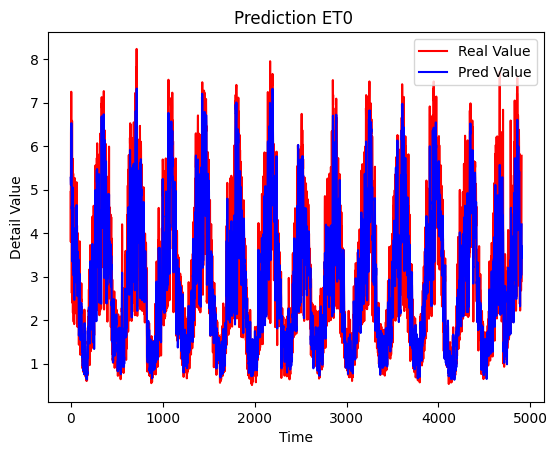

MSE: 0.45061254667522255
MAE: 0.4935494427889909
R²: 0.8519257842280282
RMSE: 0.67127680331978
pred_finally:           Pred
0     5.273634
1     5.153410
2     5.126010
3     5.105073
4     5.554919
...        ...
4900  3.030885
4901  3.142083
4902  3.679692
4903  3.430133
4904  4.200268

[4905 rows x 1 columns]


In [49]:
plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction ET0 ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('pred_finally:', pred)

## 6. ConvLSTM

A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

The ConvLSTM was developed for reading two-dimensional spatial-temporal data, but can be adapted for use with univariate time series forecasting.

In [ ]:
# # univariate convlstm example
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import ConvLSTM2D
#
#
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps
#         # check if we are beyond the sequence
#         if end_ix > len(sequence) - 1:
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
#
#
# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps = 4
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
# n_features = 1
# n_seq = 2
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# # define model
# model = Sequential()
# model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
# model.add(Flatten())
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=500, verbose=0)
# # demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

* ## Encoder-Decoder LSTM


In [144]:
# # univariate multi-step encoder-decoder lstm example
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import RepeatVector
# from keras.layers import TimeDistributed
#
#
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         # check if we are beyond the sequence
#         if out_end_ix > len(sequence):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
#
#
# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps_in, n_steps_out = 3, 2
# # split into samples
# X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X = X.reshape((X.shape[0], X.shape[1], n_features))
# y = y.reshape((y.shape[0], y.shape[1], n_features))
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(RepeatVector(n_steps_out))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(1)))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=100, verbose=0)
# # demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

* ## Multivariate Multi-Step LSTM Models


In [145]:
# # multivariate multi-step stacked lstm example
# from numpy import array
# from numpy import hstack
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
#
#
# # split a multivariate sequence into samples
# def split_sequences(sequences, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequences)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out - 1
#         # check if we are beyond the dataset
#         if out_end_ix > len(sequences):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
#
#
# # define input sequence
# in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
# # choose a number of time steps
# n_steps_in, n_steps_out = 3, 2
# # covert into input/output
# X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# # the dataset knows the number of features, e.g. 2
# n_features = X.shape[2]
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(100, activation='relu'))
# model.add(Dense(n_steps_out))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=200, verbose=0)
# # demonstrate prediction
# x_input = array([[70, 75], [80, 85], [90, 95]])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Reference:-  https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/